# Summaries


## Dependencias & Librerias

In [ ]:
!pip install datasets # For download datasets from kaggle
!pip install transformers accelerate optimum # some libs for transformers
!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu117/ #IDK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.6/433.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=9230e08bc67af554b08a9714fbd980976dd443b256a33e8f7044a686b12c9b94
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
!pip install nltk

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
from rouge_score import rouge_scorer
import pandas as pd

## Cargar dataset

In [ ]:
def load_data_old():
  """
  Load the Colombian Spanish News dataset.

  Returns:
  - dataset: The loaded dataset.
  """
  # Load the Colombian Spanish News dataset
  dataset = load_dataset("hacktoberfest-corpus-es/colmbian_spanish_news")

  # Access the dataset split (adjust as necessary)
  train_data = dataset["train"]
  test_data = dataset["test"]

  return train_data, test_data


In [ ]:
import kagglehub

def load_data():
  """
  Load the Colombian Spanish News dataset.

  Returns:
  - dataset: The loaded dataset.
  """


  # Download latest version
  path = kagglehub.dataset_download("sebastianarangou/just-some-preprocessed-data-for-homework")

  print("Path to dataset files:", path)
  # Assuming the dataset is in CSV format
  df_train_path = path + '/df_train.csv'  # Adjust based on the actual file name
  df_test_path = path + '/df_test.csv'  # Adjust based on the actual file name
  df_val_path = path + '/df_val.csv'  # Adjust based on the actual file name

  # Load the dataset into a Pandas DataFrame
  df_train = pd.read_csv(df_train_path)
  df_test = pd.read_csv(df_test_path)
  df_val = pd.read_csv(df_val_path)

  return df_train, df_test, df_val

In [ ]:
train_df = load_data()

Path to dataset files: /root/.cache/kagglehub/datasets/sebastianarangou/just-some-preprocessed-data-for-homework/versions/1


In [ ]:
df_train, df_test, df_val = load_data()

Path to dataset files: /root/.cache/kagglehub/datasets/sebastianarangou/just-some-preprocessed-data-for-homework/versions/1


## Cargar modelos y tokenizar

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# Check for GPU availability and move the model to the GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
    print("Model loaded to GPU")
else:
    device = torch.device("cpu")
    print("No GPU available, model loaded to CPU")

Model loaded to GPU


In [ ]:
def pick_new(train_data,picked_new, show_text=False):
  """
  This function helps to pick a new from the dataset and optionally visualize it
  params:
  - train_data: the news
  - picked_new: the selected new (a number)
  - show_text: true or false if you want to visualize the text of the new and its length
  returns:
  - the text of the new
  """
  # Noticia seleccionada
  picked_new:int = picked_new
  # Usamos el texto completo de alguna noticia
  if show_text:
    print(train_data["news_text_content"][picked_new])
    print(f'Palabras: {len(train_data["news_text_content"][picked_new])}')
  # Texto a resumir
  texto = train_data["news_text_content"][picked_new]
  return texto



In [ ]:
import os

def download_news(train_data,news_to_download=10, output_dir="output_files"):
  """
  Adds text to a list and downloads each item in a separate file.
  (This function is useful because it allow me to get some news for
  me to summarize manually, for the sake of evaluate of the model)
  Args:
  - text_list: A list of strings, where each string is the text to be written to a file.
  - output_dir: The directory to save the files. Defaults to "output_files".
  """
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  for new in range(news_to_download):
    text = train_data["news_text_content"][new]
    filename = os.path.join(output_dir, f"{new}.txt")
    with open(filename, "w") as f:
      f.write(text)
    print(f"File '{filename}' created successfully.")

In [ ]:
 download_news(train_data,news_to_download=10, output_dir="output_files")

File 'output_files/0.txt' created successfully.
File 'output_files/1.txt' created successfully.
File 'output_files/2.txt' created successfully.
File 'output_files/3.txt' created successfully.
File 'output_files/4.txt' created successfully.
File 'output_files/5.txt' created successfully.
File 'output_files/6.txt' created successfully.
File 'output_files/7.txt' created successfully.
File 'output_files/8.txt' created successfully.
File 'output_files/9.txt' created successfully.


In [ ]:
# Noticia seleccionada
picked_new:int = 3

In [ ]:
# Usamos el texto completo de alguna noticia
len(train_data["news_text_content"][picked_new])

4309

In [ ]:
train_data["news_text_content"][picked_new]

'Cuando los niveles de ácido úrico son elevados pueden generar cristales en las articulaciones, a lo que se le conoce como gota.\r\n\r\nLos factores por los que aumenta el nivel de ácido úrico en la sangre\r\n\r\nEl ácido úrico es un químico que se genera cuando el cuerpo descompone unas sustancias llamadas purinas, que normalmente se encuentran en el organismo, pero también en algunos alimentos y bebidas, precisa la Biblioteca Nacional de Medicina de Estados Unidos.\r\n\r\nLos productos que contienen importantes cantidades de estas sustancias son, entre otros, el hígado, las anchoas, la caballa, los fríjoles y las arvejas secas.\r\n\r\nLa mayor parte de este químico se disuelve en la sangre y luego se traslada a los riñones, desde donde es expulsado a través de la orina. Cuando el cuerpo produce demasiado ácido úrico o no lo elimina en cantidades suficientes, se pueden generar una serie de inconvenientes para el organismo, como la gota que se presenta por la formación de cristales en 

In [ ]:
# Texto a resumir
texto = train_data["news_text_content"][picked_new]


In [ ]:
def summarize_text(texto, show_summary=False):
  """
  This function helps to summarize a text
  params:
  - texto: the text to summarize
  returns:
  - the summary of the text
  """
  INITIAL_PROMPT:str = "Resume lo principal de este texto: "
  PROMPT_LEN:int = len(INITIAL_PROMPT)

  # Tokenizar el texto
  print('Generating Input Tokens')
  inputs = tokenizer.encode(
      "Resume lo principal de este texto: " + texto,
      return_tensors="pt",
      max_length=128,
      truncation=True
      ).to(device)

  # Generar el resumen
  print('Generating Summary')
  resumen_ids = model.generate(
      inputs,
      max_length=256,
      min_length=24,
      length_penalty=3.0,
      num_beams=4,
      early_stopping=True
      )

  # Decodificar
  print('Decoding Summary')
  resumen = tokenizer.decode(resumen_ids[0], skip_special_tokens=True)
  clean_resumen = resumen[PROMPT_LEN:]

  print('Done :D\n')

  if show_summary:
    print(f'Palabras: {len(clean_resumen)}')
    print(f'Resumen: \n {clean_resumen}')

  resumen_ratio = len(clean_resumen)/len(texto)
  print(f'Resumen Ratio: {resumen_ratio}')

  return clean_resumen

In [ ]:
prompt_len:int = len("Resume lo principal de este texto: ")

In [ ]:
# Tokenizar el texto
inputs = tokenizer.encode(
    "Resume lo principal de este texto: " + texto,
    return_tensors="pt",
    max_length=128,
    truncation=True
    ).to(device)


In [ ]:
# Generar el resumen
resumen_ids = model.generate(
    inputs,
    max_length=256,
    min_length=24,
    length_penalty=3.0,
    num_beams=4,
    early_stopping=True
    )


In [ ]:
# Decodificar
resumen = tokenizer.decode(resumen_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)


In [ ]:
# Mostrar el resumen
print(f'Palabras: {len(resumen)}')
resumen

Palabras: 810


'Resume lo principal de este texto: Cuando los niveles de ácido úrico son elevados pueden generar cristales en las articulaciones, a lo que se le conoce como gota.\r\n\r\nLos factores por los que aumenta el nivel de ácido úrico en la sangre\r\n\r\nEl ácido úrico es un químico que se genera cuando el cuerpo descompone unas sustancias llamadas purinas, que normalmente se encuentran en el organismo, pero también en algunos alimentos y bebidas, precisa la Biblioteca Nacional de Medicina de los EE. UU.\r\n\r\nLos niveles de ácido úrico en la sangre pueden aumentar por muchas razones, incluyendo:\r\n\r\n1. La diabetes\r\n2. La enfermedad renal crónica\r\n3. La enfermedad hepática crónica\r\n4. El alcoholismo\r\n5. La obesidad\r\n6. La hipertensión\r\n7. Los medicamentos\r\n\r\nLos niveles de ácido úrico en la sangre también pueden aument'

In [ ]:
picked_new:int = 4
show_text:bool = True
new_text:str = pick_new(df_train,picked_new, show_text)

me dirán que, ante el malismo de otros, bienvenido sea el buenismo de zapatero. como mínimo el presidente viaja por el mundo con la mochila de las buenas intenciones, y, arropado en su vocación de mafalda, se va a la onu a pedir que salvemos el mundo. es cierto que después sus discursos no aterrizan en la antipática concreción de los proyectos, sino que navegan libres por la vacuidad de la retórica, pero eso es menor porque, al fin y al cabo, ¿quién cree, a estas alturas, que la onu sirva para algo más que para lucirse con la oratoria? no es que la entrañable institución haya fracasado nuevamente en su intento de reforma, es que es un organismo caduco, secuestrado por las decenas de dictaduras que la componen, las cuales consiguen blanquear su pesada carga tiránica gracias a la legitimidad que les da la asamblea general. en la onu, los países que vulneran todos los derechos fundamentales, los que alimentan y potencian el terrorismo, los que convierten a sus mujeres en esclavas, los que

In [ ]:
show_summary:bool = True
summarize_text(new_text, show_summary)
print('')

Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Palabras: 213
Resumen: 
 el mundo con la mochila de las buenas intenciones, y, arropado en su vocación de mafalda, se va a la onu a pedir que salvemos el mundo con la mochila de las buenas intenciones, se va a la onu a pedir que salvemos 
Resumen Ratio: 0.03446601941747573



## Evaluacion Resumen

In [ ]:
# Resumenes

# Example reference summaries (replace with actual reference summaries)
reference_summaries = [
    "Elianis Garrido se casó en secreto en la playa de Barranquilla con el empresario Álvaro Navarro. La presentadora compartió fotos del evento, mostrando un ambiente íntimo y familiar. Con un vestido blanco y zapatos verdes, celebró con alegría. La boda incluyó una parranda, y los invitados publicaron videos del festejo. La noticia ha generado múltiples felicitaciones en redes.",
    "La moda española ha atravesado una década de altibajos, con la crisis económica y la pandemia impactando duramente el sector. Tras la caída del volumen de negocio a la mitad desde 2011, el slow fashion ha emergido como alternativa sostenible. Diseñadores como Palomo Spain, Leandro Cano y Teresa Helbig han sabido adaptarse, mientras que las redes sociales han impulsado marcas nicho. Sin embargo, la inestabilidad financiera sigue afectando a creadores como Daniel Rabaneda y Josep Font. Mientras tanto, figuras como Marta Ortega ganan protagonismo en la escena global.",
    "Carolina Soto, codirectora del Banco de la República, analizó la gestión económica de Colombia durante la pandemia y los desafíos de 2021 en *Perspectivas Colombia 2021*. Destacó el acceso a financiamiento externo en condiciones favorables y la estabilidad macroeconómica del país. El Banco Central implementó medidas no tradicionales para sostener el crédito. Se proyecta una contracción del PIB de cerca del 7% en 2020 y un crecimiento entre 3% y 7% en 2021. Los principales retos incluyen garantizar la sostenibilidad de la deuda mediante una reforma fiscal gradual, corregir problemas estructurales en el mercado laboral y monitorear riesgos en el sector financiero.",
    "El ácido úrico se genera al descomponer purinas presentes en el cuerpo y en alimentos como carnes rojas, mariscos y bebidas azucaradas. Si el cuerpo no lo elimina adecuadamente, puede acumularse y formar cristales en las articulaciones, causando gota. Factores como dieta, genética, obesidad, alcohol, ciertos medicamentos y enfermedades como hipotiroidismo e insuficiencia renal pueden elevar sus niveles. Para evitarlo, se recomienda moderar el consumo de alimentos ricos en purinas, reducir el alcohol y mantener un estilo de vida saludable.",
    "El artículo de Pilar Rahola critica la \"Alianza de Civilizaciones\" de Zapatero, calificándola de retórica vacía que no enfrenta los problemas reales de democracia y derechos humanos. Argumenta que legitima dictaduras en lugar de denunciarlas y cuestiona la eficacia de la ONU, que considera un foro donde regímenes autoritarios buscan validación. Rahola rechaza tanto el \"choque de civilizaciones\" de Huntington como el idealismo de Zapatero, abogando por una alianza basada en la defensa de la democracia y los derechos fundamentales en lugar de acuerdos abstractos sin consecuencias reales.",
    "Shakira ha resurgido con su sencillo *Monotonía*, mientras que Clara Chía enfrenta una crisis personal por la presión mediática tras la canción. Según el periodista Jordi Martin, la joven ha optado por el teletrabajo y evita la exposición pública. Piqué tampoco atraviesa su mejor momento: su empresa Kosmos enfrenta dificultades y un proyecto inmobiliario suyo en Málaga ha sido retrasado por el hallazgo de una necrópolis musulmana. La situación ha llevado a la prensa a señalar su “mala racha”, marcada por problemas personales, profesionales y la polémica con Shakira.",
    "Una brecha digital en un servidor privado expuso datos sensibles de millones de ecuatorianos. El Gobierno atribuyó la filtración a dos exfuncionarios que habrían sustraído información estatal. La empresa de seguridad vpnMentor alertó sobre la vulnerabilidad el 11 de septiembre, señalando que al menos seis entidades públicas se vieron afectadas. Aunque no se ha confirmado el uso indebido de los datos, expertos advierten sobre riesgos de suplantación de identidad. En respuesta, el Gobierno aceleró la aprobación de una ley de Protección de Datos para reforzar la seguridad de la información ciudadana.",
    "Moody’s cambió la perspectiva de la calificación de Ecuador de estable a negativa, manteniendo la nota B3 a largo plazo. La decisión se debe al riesgo de liquidez antes de los pagos de deuda y al difícil acceso al mercado, con altos costos de endeudamiento. Aunque el financiamiento multilateral podría ayudar, sin reformas macroeconómicas más firmes, no sería suficiente. A pesar del deterioro fiscal, Ecuador mantiene mayor solidez que países con calificación similar. Además, la calificación del bono 2030 sigue en C, reflejando reclamos pendientes del canje de 2009. Los techos de calificación en moneda extranjera permanecen sin cambios.",
    "Durante la grabación de El pasado no perdona, la relación entre los actores Marlon Moreno y Andrea Nocetti se volvió tensa. Nocetti confrontó a Moreno por su actitud distante, y él le respondió de manera despectiva. La situación escaló cuando Moreno, furioso, la golpeó en el rostro, lo que causó conmoción en el set. Aunque Nocetti no lo demandó, sí interpuso una caución. La producción modificó escenas para minimizar su contacto, pero ella no recibió mucho apoyo. A pesar de incidentes como este, las novelas colombianas siguen siendo exitosas y han dejado una huella en la industria audiovisual.",
    "Lincoln Palomeque, tras su ruptura con Carolina Cruz, reveló en una entrevista que busca una mujer auténtica, con personalidad y una mirada especial. Mientras tanto, Cruz compartió reflexiones sobre el amor y la libertad en redes, lo que algunos tomaron como indirectas hacia él. A pesar de la separación, mantienen una relación cordial por sus hijos. Palomeque le dedicó un mensaje a Cruz en el Día de la Madre, destacando su labor como madre. Por su parte, Cruz publicó una emotiva reflexión sobre la maternidad y la fortaleza que sus hijos le han dado."
]


In [ ]:
def generate_summaries(df_train, num_summaries=10):
    summaries = []
    for i in range(num_summaries):
        texto = pick_new(df_train, i)
        summary = summarize_text(texto,False)
        summaries.append(summary)
    return summaries


In [ ]:
resumenes = generate_summaries(df_train, num_summaries=10)

Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.09460025115110925
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.024434389140271493
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.1
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.0545410860163383
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.03446601941747573
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.0130475302889096
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.03484513274336283
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.14490603363006924
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Ratio: 0.07033822208919485
Generating Input Tokens
Generating Summary
Decoding Summary
Done :D

Resumen Rati

In [ ]:
# ## Evaluacion Resumen

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [ ]:
# Calculate ROUGE scores
all_scores = [scorer.score(resumenes[i], ref) for i,ref in enumerate(reference_summaries)]

In [ ]:
# Print ROUGE scores
print("ROUGE Scores:")
all_scores

ROUGE Scores:


[{'rouge1': Score(precision=0.23333333333333334, recall=0.32558139534883723, fmeasure=0.2718446601941748),
  'rougeL': Score(precision=0.13333333333333333, recall=0.18604651162790697, fmeasure=0.15533980582524273)},
 {'rouge1': Score(precision=0.06451612903225806, recall=0.23076923076923078, fmeasure=0.10084033613445378),
  'rougeL': Score(precision=0.053763440860215055, recall=0.19230769230769232, fmeasure=0.08403361344537814)},
 {'rouge1': Score(precision=0.24545454545454545, recall=0.6, fmeasure=0.34838709677419355),
  'rougeL': Score(precision=0.15454545454545454, recall=0.37777777777777777, fmeasure=0.2193548387096774)},
 {'rouge1': Score(precision=0.2839506172839506, recall=0.5476190476190477, fmeasure=0.3739837398373984),
  'rougeL': Score(precision=0.13580246913580246, recall=0.2619047619047619, fmeasure=0.17886178861788618)},
 {'rouge1': Score(precision=0.1702127659574468, recall=0.36363636363636365, fmeasure=0.23188405797101447),
  'rougeL': Score(precision=0.1382978723404255

In [ ]:
# Calculate average ROUGE-1 recall across all references
avg_rouge1_recall = sum([scores['rouge1'].recall for scores in all_scores]) / len(all_scores)
print(f"Average ROUGE-1 Recall: {avg_rouge1_recall}")


Average ROUGE-1 Recall: 0.4459367733279912


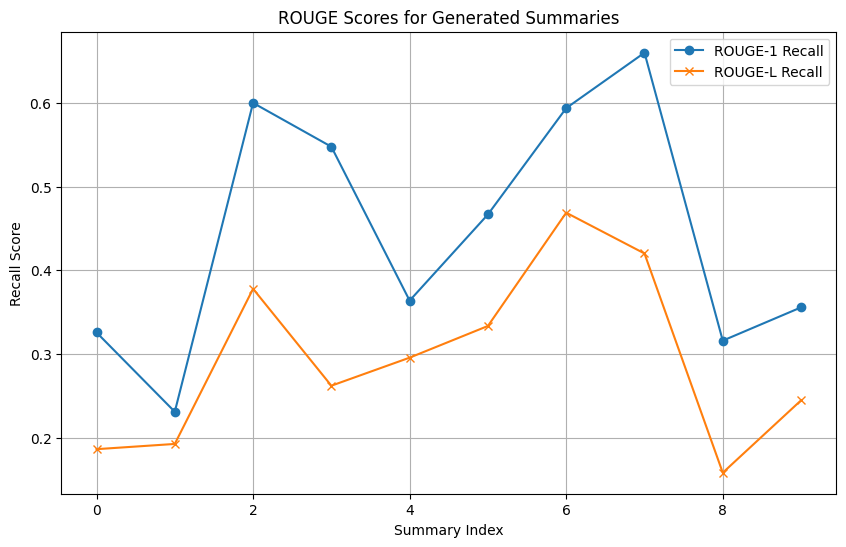

In [ ]:
import matplotlib.pyplot as plt

# Extract ROUGE-1 and ROUGE-L recall scores
rouge1_recall_scores = [scores['rouge1'].recall for scores in all_scores]
rougeL_recall_scores = [scores['rougeL'].recall for scores in all_scores]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(rouge1_recall_scores, label='ROUGE-1 Recall', marker='o')
plt.plot(rougeL_recall_scores, label='ROUGE-L Recall', marker='x')

# Customize the plot
plt.xlabel('Summary Index')
plt.ylabel('Recall Score')
plt.title('ROUGE Scores for Generated Summaries')
plt.legend()
plt.grid(True)
plt.show()


## Análisis General de las Métricas

### ROUGE-1 (unigramas):

- Promedio de la precisión de ROUGE-1 en los resúmenes generados varía entre un 0.06 y 0.29. Esto indica que el modelo, en promedio, tiene una precisión moderada para capturar los unigramas presentes en los resúmenes de referencia.
- Promedio de recall de ROUGE-1 va de 0.23 a 0.66, lo que sugiere que el modelo es más capaz de identificar las palabras clave presentes en los resúmenes de referencia, aunque no siempre logra capturarlas todas.
- Promedio del F1-score de ROUGE-1 se encuentra entre 0.08 y 0.41, lo que sugiere que, aunque el modelo tiene un rendimiento variable, en general está moderadamente bien equilibrado en precisión y recall.

### ROUGE-L (subsecuencia más larga común):

- Promedio de la precisión de ROUGE-L varía entre 0.05 y 0.19, lo que indica que el modelo tiene un rendimiento bajo en cuanto a la captura de la subsecuencia más larga común entre los resúmenes generados y los de referencia.- Promedio de recall de ROUGE-L también varía entre 0.16 y 0.47, lo que sugiere que el modelo es capaz de recuperar una parte de la subsecuencia más larga, pero no siempre la captura completamente.
- Promedio del F1-score de ROUGE-L varía entre 0.08 y 0.26, lo que refleja que la calidad del modelo en términos de subsecuencias comunes podría mejorar significativamente.

## Conclusiones

### Variabilidad en el Rendimiento:

Existen diferencias notables en las métricas de cada entrada, lo que puede reflejar una inconsistencia en la calidad de los resúmenes generados por el modelo. Por ejemplo, algunos resúmenes tienen valores de ROUGE-1 F1 cerca de 0.4, mientras que otros están por debajo de 0.1.
Esto sugiere que el modelo podría estar funcionando bien en ciertos casos pero con dificultades para generalizar en otros.

### Posible Sobregeneralización:

La precisión baja en ROUGE-1 junto con un recall más alto en algunas métricas podría indicar que el modelo tiende a identificar muchas palabras relevantes (recall alto), pero solo una pequeña parte de ellas es exacta (precisión baja). Esto podría ser indicativo de que el modelo produce resúmenes muy largos o imprecisos.

### Bajo Rendimiento en ROUGE-L:

El desempeño en ROUGE-L, que evalúa las subsecuencias más largas, es generalmente más bajo que en ROUGE-1. Esto podría indicar que el modelo no está capturando las estructuras subyacentes del texto de forma efectiva o que no está manteniendo la coherencia entre las palabras clave.


## Recomendaciones para Mejorar el Modelo

1. Ajustar el modelo
2. Uso de más datos de entrenamiento
3. Optimización de la calidad de los resúmenes:
4. Evaluación de otras métricas:

In [ ]:
# prompt: De las conclusiones anteriores y el analisis de metricas, por favor, haz un texto de 2 parrafos

